In [1]:
import pandas as pd 
train=pd.read_csv("oliveoil.csv")
train.head()

,macro.area,region,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,South,Apulia.north,1075,75,226,7823,672,36,60,29
1,South,Apulia.north,1088,73,224,7709,781,31,61,29
2,South,Apulia.north,911,54,246,8113,549,31,63,29
3,South,Apulia.north,966,57,240,7952,619,50,78,35
4,South,Apulia.north,1051,67,259,7771,672,50,80,46


In [2]:
train.info()
print(train.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   macro.area   572 non-null    object
 1   region       572 non-null    object
 2   palmitic     572 non-null    int64 
 3   palmitoleic  572 non-null    int64 
 4   stearic      572 non-null    int64 
 5   oleic        572 non-null    int64 
 6   linoleic     572 non-null    int64 
 7   linolenic    572 non-null    int64 
 8   arachidic    572 non-null    int64 
 9   eicosenoic   572 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 44.8+ KB
Index(['macro.area', 'region', 'palmitic', 'palmitoleic', 'stearic', 'oleic',
       'linoleic', 'linolenic', 'arachidic', 'eicosenoic'],
      dtype='object')


In [3]:
"""
the feature names represent the fatty acid composition of the olive oil and some information about the region where
they are produced. we are just going to go ahead and perform k-means clustering on the fatty acid composition of the olive oil.
but before that i want to perform some data cleaning and data preprocessing steps.
"""

'\nthe feature names represent the fatty acid composition of the olive oil and some information about the region where\nthey are produced. we are just going to go ahead and perform k-means clustering on the fatty acid composition of the olive oil.\nbut before that i want to perform some data cleaning and data preprocessing steps.\n'

Text(0.5, 0.98, 'Distribution of Numerical Features')

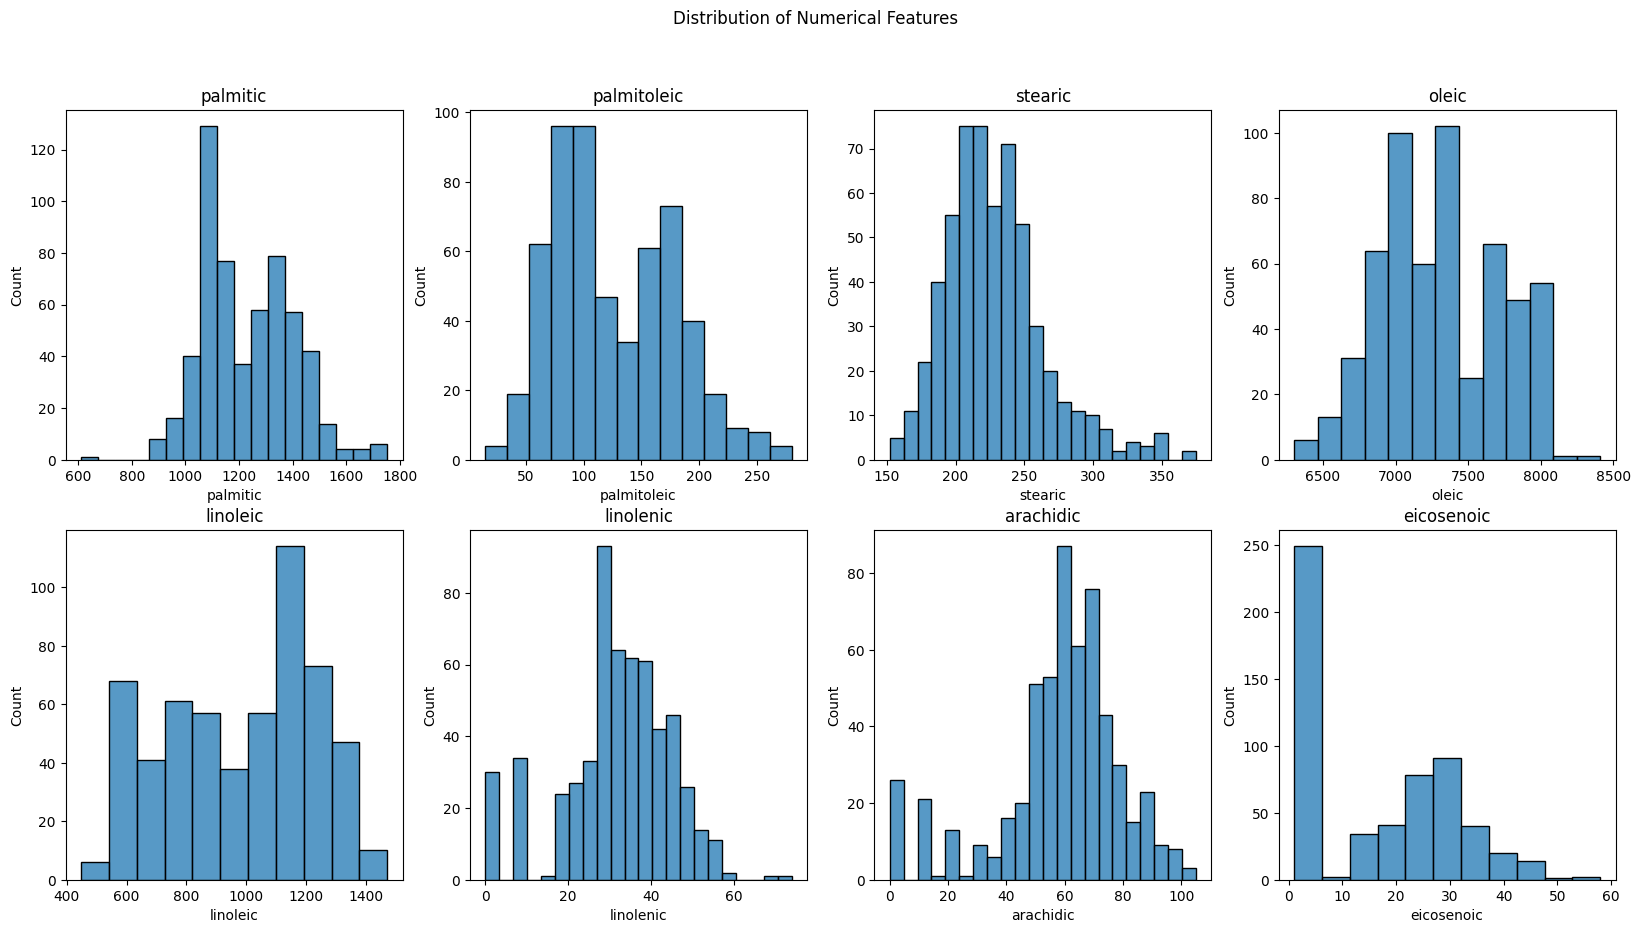

In [4]:
#first id like to perofrm some visualizations on the data
#first lets see the distribution of the numerical features in the dataset which correspond to the fatty acid composition of the olive oil
import seaborn as sns
import matplotlib.pyplot as plt
numerical_features = ['palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic']
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
for i, feature in enumerate(numerical_features):
    row = i // 4
    col = i % 4
    sns.histplot(train[feature], ax=axs[row][col], kde=False)
    axs[row][col].set_title(feature)
fig.suptitle('Distribution of Numerical Features')
#most of the distribution of fatty acids are obviously really skewed and we can see that the distribution of the fatty acids are different from each other

'\nwe can see that the categorical features are not very well balanced , most of the olive oils in our dataset are picked up from the apulia south which is located \nin italy and the least number of olive oils are picked up from the north region of apulia , that explains why most of the olive oils are picked from the south region\n'

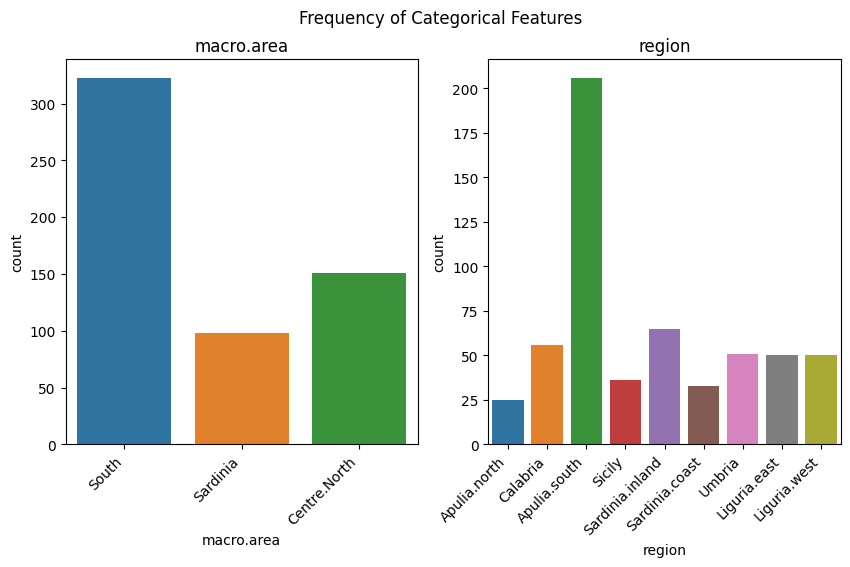

In [5]:
#now lets see the distribution of the categorical features in the dataset which correspond to the region where the olive oil is produced
categorical_features = ['macro.area', 'region']
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=train, ax=axs[i])
    axs[i].set_title(feature)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
fig.suptitle('Frequency of Categorical Features')
"""
we can see that the categorical features are not very well balanced , most of the olive oils in our dataset are picked up from the apulia south which is located 
in italy and the least number of olive oils are picked up from the north region of apulia , that explains why most of the olive oils are picked from the south region
"""

In [6]:
#now im going to begin preprocessing , ive noticed that ther are no missing values so im just going to encode the categorical features and scale the numerical features
from sklearn.preprocessing import StandardScaler
numerical_features=['palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic']
categorical_features=['macro.area', 'region']
def scale_features(df,numerical_features):
    scaler=StandardScaler()
    scaled_df=df.copy()
    scaled_df[numerical_features] = scaler.fit_transform(scaled_df[numerical_features])
    return scaled_df,scaler #this functions perform standarized scaling and returns the scaled dataframe along with its scaler object
def encode_categorical(df, categorical_cols):
    df_encoded = df.copy()
    for feature in categorical_cols:
        df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded[feature], prefix=feature)], axis=1)
        df_encoded.drop(columns=[feature], inplace=True)
    return df_encoded #this function performs one hot encoding and returns the encoded dataframe along with its encoder object
#we are just going to go ahead and invoke both of the functions on our dataset to perform the preprocessing steps
scaled_df,scaler=scale_features(train,numerical_features)
encoded_df=encode_categorical(scaled_df,categorical_features)
encoded_df.head()
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   palmitic                 572 non-null    float64
 1   palmitoleic              572 non-null    float64
 2   stearic                  572 non-null    float64
 3   oleic                    572 non-null    float64
 4   linoleic                 572 non-null    float64
 5   linolenic                572 non-null    float64
 6   arachidic                572 non-null    float64
 7   eicosenoic               572 non-null    float64
 8   macro.area_Centre.North  572 non-null    uint8  
 9   macro.area_Sardinia      572 non-null    uint8  
 10  macro.area_South         572 non-null    uint8  
 11  region_Apulia.north      572 non-null    uint8  
 12  region_Apulia.south      572 non-null    uint8  
 13  region_Calabria          572 non-null    uint8  
 14  region_Liguria.east      5

/home/jawhar/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jawhar/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jawhar/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jawhar/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jawhar/.local/lib/python3.

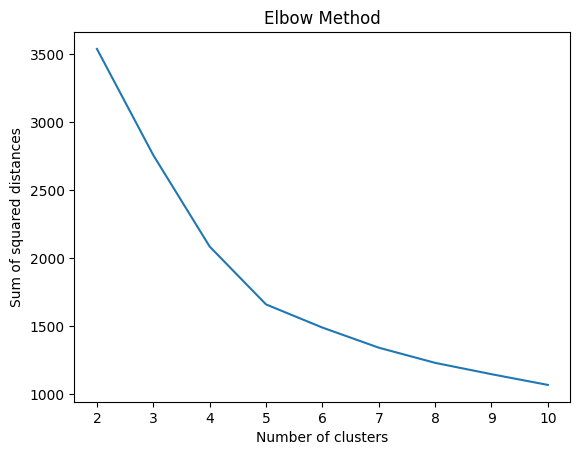

'\nthe elbow method helps us to find the optimal number of clusters for our dataset , we can see that the elbow is at 5 so we are going to go ahead and use 5 clusters\nthe 5 represents the optimal number of clusters for k-means clustering on our dataset, the idea behind the elbow method is that as the number of clusters increases,\nThe SSE value will decrease (sum squared error) at some point the rate of decrease will start to slow down and this point is the elbow point.creating a visualization like this\nwhich kinda looks like an elbow bro which is kinda interesting id say \n'

In [7]:
#okay now after we are done with preprocessing our data we are just going to proceed with the k-means clustering algorithm and explore the results
from sklearn.cluster import KMeans
import numpy as np
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
sse = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(encoded_df)
    sse.append(kmeans.inertia_)
plt.plot(range_n_clusters, sse)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show() 
"""
the elbow method helps us to find the optimal number of clusters for our dataset , we can see that the elbow is at 5 so we are going to go ahead and use 5 clusters
the 5 represents the optimal number of clusters for k-means clustering on our dataset, the idea behind the elbow method is that as the number of clusters increases,
The SSE value will decrease (sum squared error) at some point the rate of decrease will start to slow down and this point is the elbow point.creating a visualization like this
which kinda looks like an elbow bro which is kinda interesting id say 
"""

In [8]:
optimal_n_clusters=5 #we are going to use 5 clusters for our k-means clustering algorithm according to 
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans.fit(encoded_df)
labels = kmeans.labels_

/home/jawhar/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


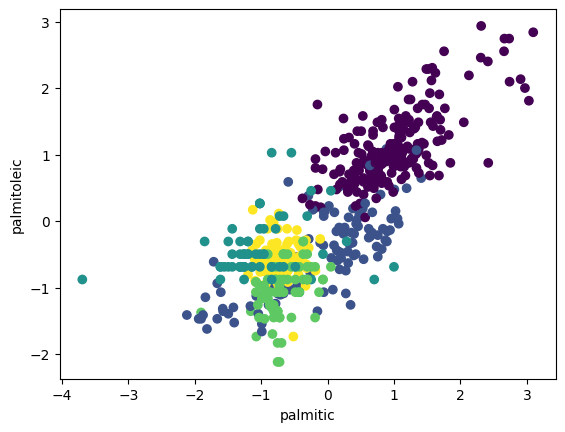

In [9]:
def plot_clusters(X, y, feature1, feature2):
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()
plot_clusters(encoded_df.values, labels, 'palmitic', 'palmitoleic')
#just wanted to go ahead and play a bit and visualize the clusters in a 2d space , we can see that the clusters are not very well separated and there is a lot of overlap between them

In [10]:
#now we are going to assign our new labels to our dataset and prepare for the next task which is to perform classification on our dataset using various models 
#LETS GOO YAYYY
train = train.assign(cluster=labels)
train.head()

,macro.area,region,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,cluster
0,South,Apulia.north,1075,75,226,7823,672,36,60,29,1
1,South,Apulia.north,1088,73,224,7709,781,31,61,29,1
2,South,Apulia.north,911,54,246,8113,549,31,63,29,3
3,South,Apulia.north,966,57,240,7952,619,50,78,35,1
4,South,Apulia.north,1051,67,259,7771,672,50,80,46,1


'\nto be completely honest i dont have any idea about the nature of the clusters and how they are formed , but we can see that the clusters are not very well balanced\nbut the thing is im not really okay with me plotting our target labels with class names that have no signifcance so im just going to analyze the mean feature \nvalues of each cluster and desribe them using adjectives , like if a cluster has high mean values for palmitic or stearic and archidic fatty acids then im just going to \nassign an adjectives which is compatible with these values to give it more meaning and significance \n'

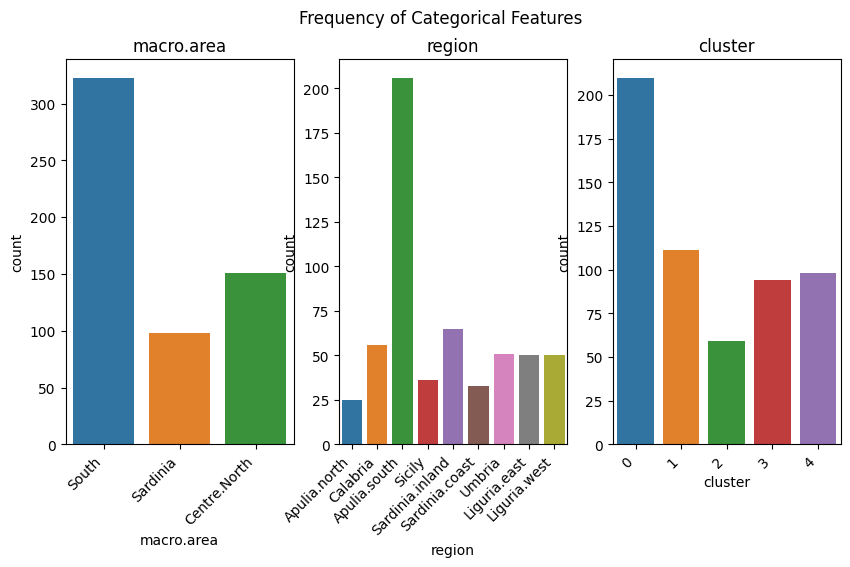

In [11]:
categorical_features = ['macro.area', 'region', 'cluster']
fig, axs = plt.subplots(ncols=3, figsize=(10, 5))
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=train, ax=axs[i])
    axs[i].set_title(feature)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
fig.suptitle('Frequency of Categorical Features')
"""
to be completely honest i dont have any idea about the nature of the clusters and how they are formed , but we can see that the clusters are not very well balanced
but the thing is im not really okay with me plotting our target labels with class names that have no signifcance so im just going to analyze the mean feature 
values of each cluster and desribe them using adjectives , like if a cluster has high mean values for palmitic or stearic and archidic fatty acids then im just going to 
assign an adjectives which is compatible with these values to give it more meaning and significance 
"""

In [12]:
centroids = kmeans.cluster_centers_
means = np.mean(encoded_df, axis=0)
adjectives = []
for i in range(optimal_n_clusters):
    centroid = centroids[i]
    dev = centroid - means
    top_feature_indices = np.argsort(dev)[-3:] # select the top 3 most deviated features
    adjectives.append([f"{encoded_df.columns[idx]}: high" if dev[idx] > 0 else f"{encoded_df.columns[idx]}: low" for idx in top_feature_indices])

for i in range(optimal_n_clusters):
    print(f"Cluster {i+1}: {' '.join(adjectives[i])}")

Cluster 1: linoleic: high palmitic: high palmitoleic: high
Cluster 2: stearic: high linolenic: high eicosenoic: high
Cluster 3: stearic: high region_Liguria.west: high oleic: high
Cluster 4: region_Umbria: high macro.area_Centre.North: high oleic: high
Cluster 5: arachidic: high macro.area_Sardinia: high linoleic: high


In [13]:
train['cluster_adjectives'] = ''
for i in range(len(train)):
    cluster_label = kmeans.predict(encoded_df.iloc[i].values.reshape(1,-1))[0]
    train.loc[i, 'cluster_adjectives'] = ' '.join(adjectives[cluster_label])

/home/jawhar/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/home/jawhar/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/home/jawhar/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/home/jawhar/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/home/jawhar/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/home/jawhar/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid featu

In [14]:
train.head()

,macro.area,region,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,cluster,cluster_adjectives
0,South,Apulia.north,1075,75,226,7823,672,36,60,29,1,stearic: high linolenic: high eicosenoic: high
1,South,Apulia.north,1088,73,224,7709,781,31,61,29,1,stearic: high linolenic: high eicosenoic: high
2,South,Apulia.north,911,54,246,8113,549,31,63,29,3,region_Umbria: high macro.area_Centre.North: h...
3,South,Apulia.north,966,57,240,7952,619,50,78,35,1,stearic: high linolenic: high eicosenoic: high
4,South,Apulia.north,1051,67,259,7771,672,50,80,46,1,stearic: high linolenic: high eicosenoic: high


In [15]:
train.to_csv("../datasets/labeled_olive_oil.csv", index=False)